## Modificando el archivo de configuración **namelist.wps** para ejecutar ungrib.exe

- GRIB (*Gridded Binary*) es un formato de archivo desarrollado por la Organización Meteorológica Mundial (WMO, por sus siglas en inglés) para almacenar campos distribuidos regularmente, es decir en mallas.
- El objetivo de este formaro es facilitar el almacenamiento y la transferencia de la información meteorológica pronosticada.
- Particularmente, el programa *ungrib.exe* lee las versiones 1 y 2 del formato GRIB, y extrae los campos meteorológicos necesarios para realizar una simulación numérica.
- *Ungrib.exe* escribe los campos extraídos a un formato intermedio, el cual es requerido por el siguiente programa *metgrid.exe*.
- Para extarer los campos meteorológicos, *ungrib.exe* hace uso de las Vtables (de **V**ariable **tables**).
    - Las Vtables son archivos que proporcionan los códigos GRIB para cada campo meteorológico a ser extraído desde los archivos GRIB.
- Existe una Vtable por cada fuente de datos: Vtable.CFSR, Vtable.ECMWF, Vtable.GFS, Vtable.NAM, etc. 
- En la imagen de abajo se muestra la Vtable empleada para leer los datos GRIB CFSR: 
<div>
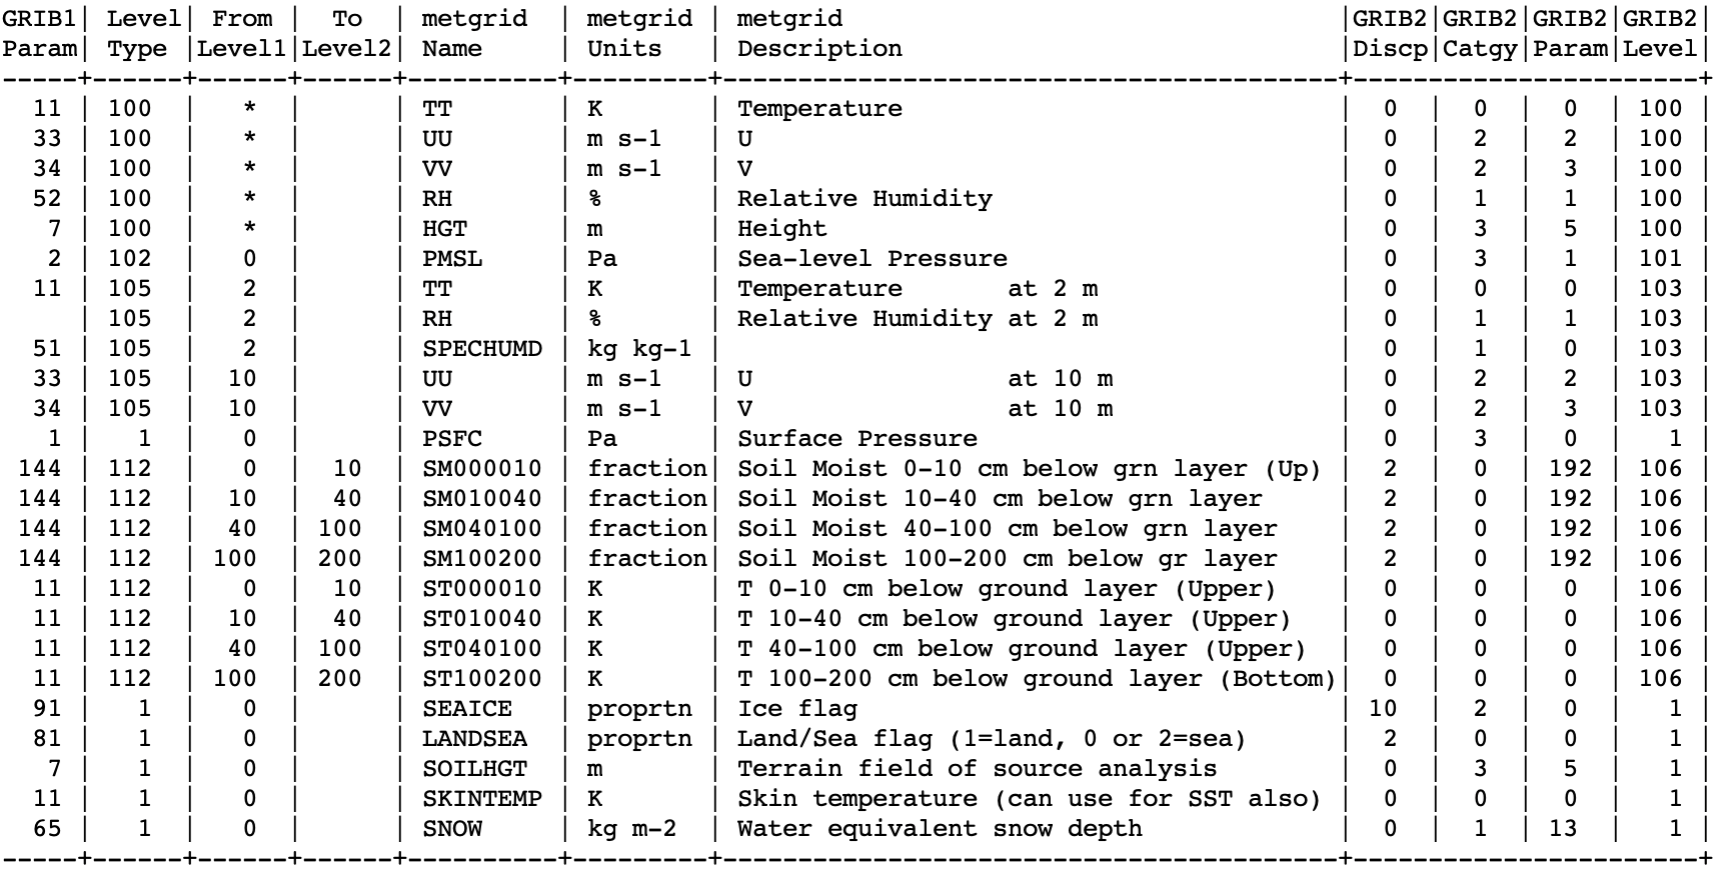
</div> 

---

## Modificando el archivo de configuración **namelist.wps** para ejecutar **ungrib.exe**

- Las secciones importantes dentro del archivo *namelist.wps* a modificar son *&share* y *&ungrib*.
- Dentro de *&share* lo importante es tener bien definido las fechas de inicio y fin de la simulación: **start_date** y **end_date**. Esto de acuerdo con los datos GRIB que fueron descargados. 
    - Para nuestro caso definimos el periodo de simulación del **13 al 14 de mayo de 2022 a las 00 horas**.
- Además, es necesario definir el intervalo entre los archivos de los datos meteorológicos (GRIB) (**interval_seconds**). En nuestro caso 21600 segundos, es decir, cada 6 horas. 
- Dentro de *&ungrib* es importamte definir **out_format** para seleccionar el formato de los datos intermedios que *ungrib.exe* escribirá, para nuestro caso *WPS*. Y el prefijo (**prefix**) de los archivos intermedios que se escribirán. Generalmente se deja *FILE* pero nosotros al leer datos GFSR emplearemos dos prefijos: *SFX* y *PRES* para identificar los datos de superficie y de presión, respectivamente.
- Modifica el archivo *namelist.wps* para leer primero los datos en superficie:

<div>
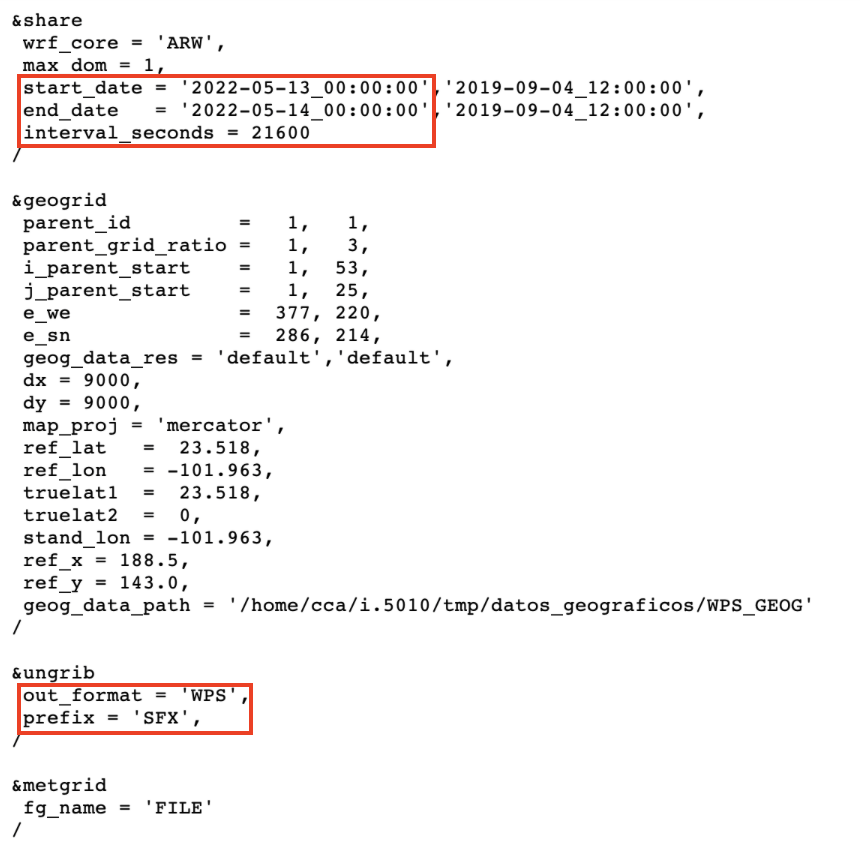
</div> 

- Como vimos al principio, es necesario trabajar con una *Vtable*, para nuestro caso la que lea datos CFSR. 
- [Revisar la tabla de datos GRIB][free_data] 
[free_data]: https://www2.mmm.ucar.edu/wrf/users/download/free_data.html

- Ahí nos sugiere las siguientes tablas: **Vtable.CFSR_sfc_flxf06** y **Vtable.CFSR_press_pgbh06**. 
   - Bajarlas y copiarlas dentro de la carpeta *Variables_Tables* que se encuentra en *2022/wrf/WPS-4.3.1/ungrib/*
- Una vez realizado lo anterior, ligar la Vtable y vincular los archivos GRIB a los nombres de archivos que espera *ungrib.exe* mediante el script *link_grib.csh*   
    1. ln -sf ungrib/Variable_Tables/Vtable.CFSR_sfc_flxf06 Vtable

    2. ./link_grib.csh ../../../datos_dinamicos/srf_flx/*
<div>
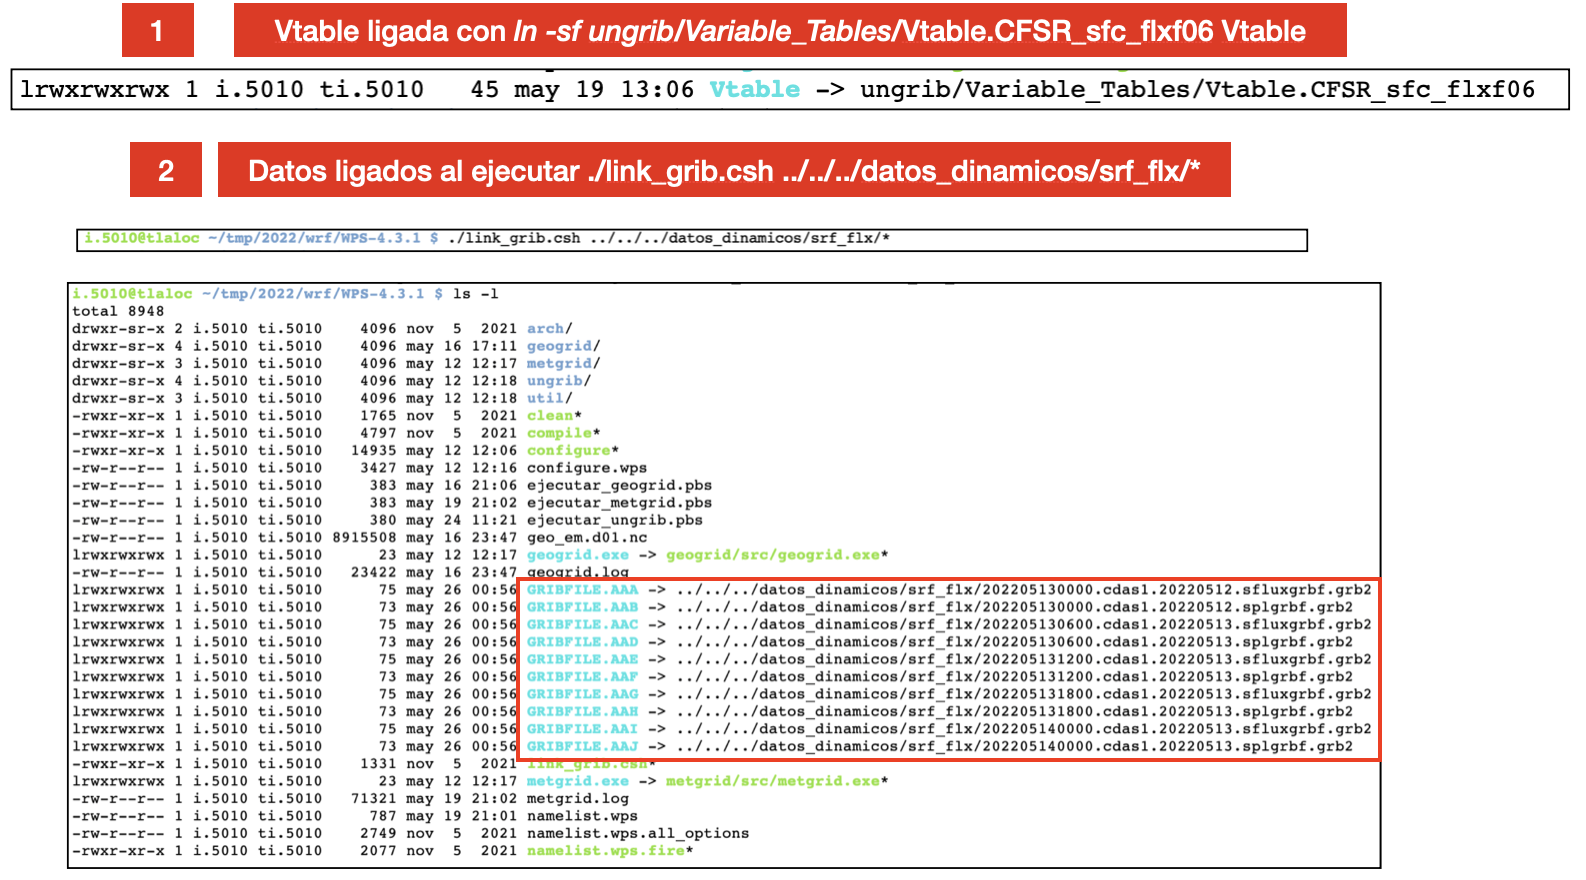
</div> 

    
- Ahora ejecuta el programa *ungrib.exe* para esos archivos en superficie ligados:
**sbatch ejecutar_ungrib.pbs**

<div>
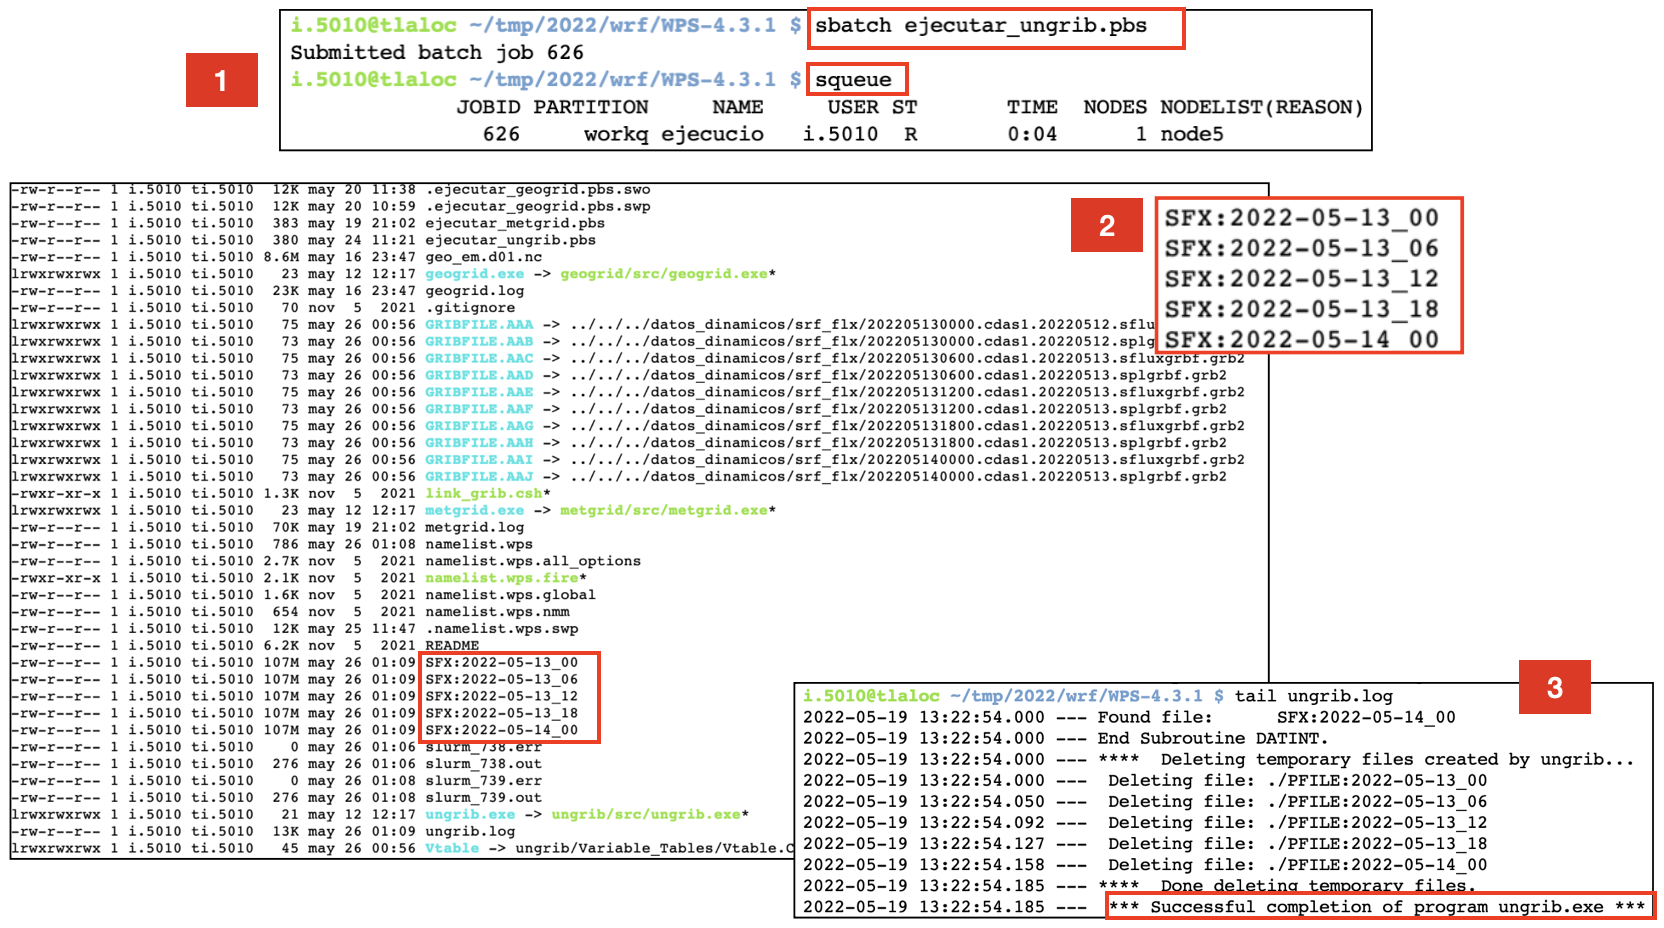
</div> 

- Ahora ejecutamos *ungrib.exe* para los datos de presión:
- Recuerda los paso: se configura el *namelis.wps*, se liga la *VTable*, se vinculan los archivos de presión mediante el script *link_grib.csh* y se ejecuta *ungrib.exe* para esos datos:
#### Modificando el namelist.wps
<div>
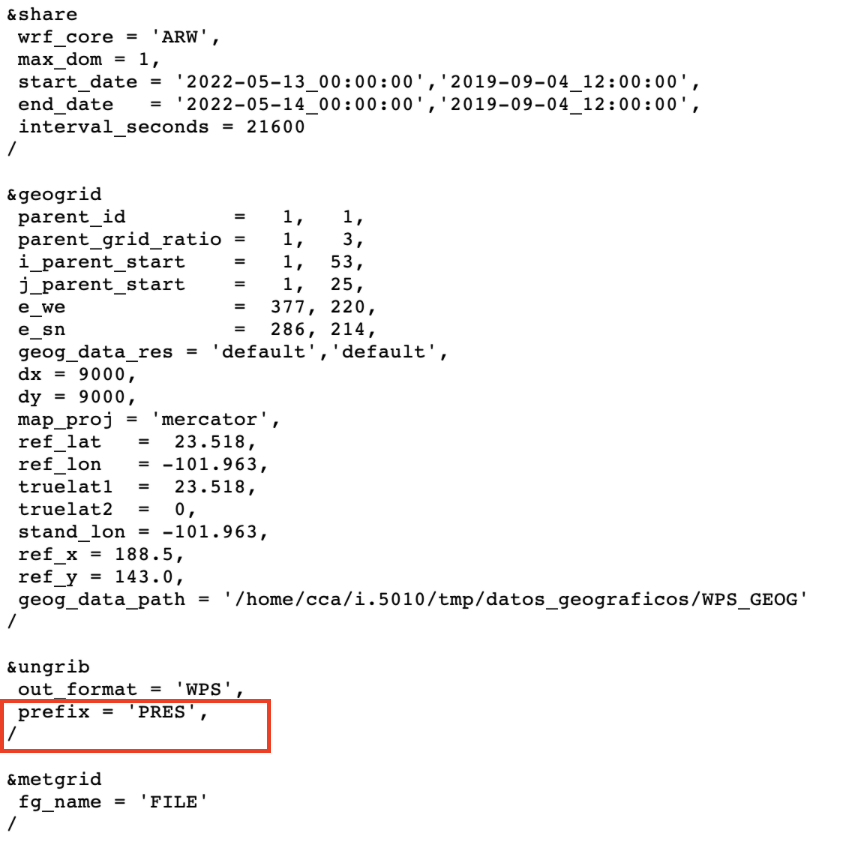
</div> 

#### Ligando los archisvos de presión y ejecutando *ungrib.exe*

<div>
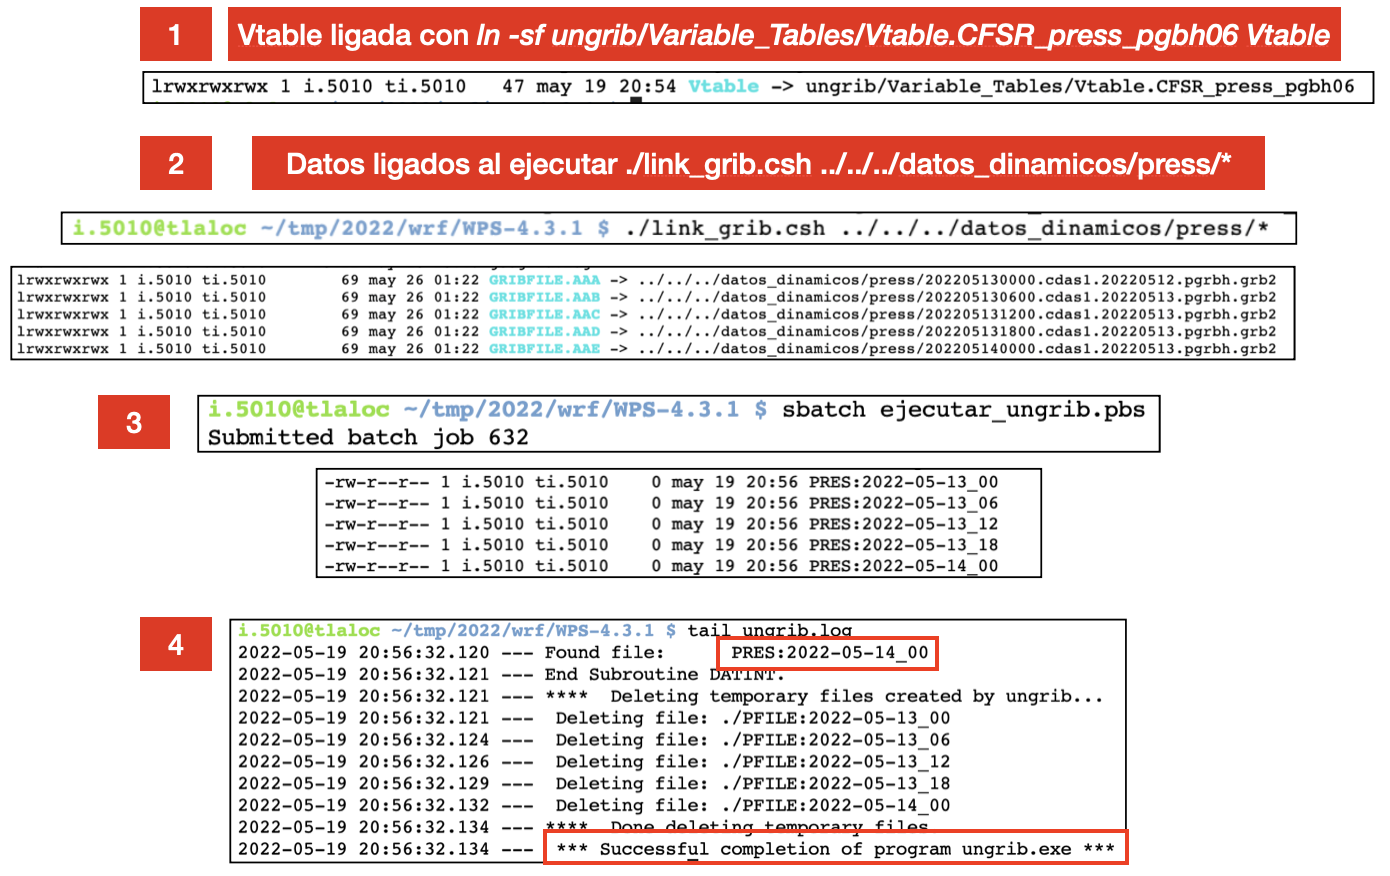
</div> 